In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [2]:
file_path= Path('..','data','abuse_report.json')

In [3]:
with open (file_path, 'r') as file:
    data = json.load(file)

In [4]:
df=pd.DataFrame(data)

In [5]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
abusive-words_found,[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
sentiment,"{'sentiment': 'NEGATIVE', 'confidence': 0.985}","{'sentiment': 'NEGATIVE', 'confidence': 0.998}","{'sentiment': 'NEGATIVE', 'confidence': 0.978}","{'sentiment': 'NEGATIVE', 'confidence': 0.772}","{'sentiment': 'POSITIVE', 'confidence': 1.0}","{'sentiment': 'POSITIVE', 'confidence': 1.0}","{'sentiment': 'NEGATIVE', 'confidence': 0.971}","{'sentiment': 'NEGATIVE', 'confidence': 0.999}","{'sentiment': 'POSITIVE', 'confidence': 0.802}","{'sentiment': 'POSITIVE', 'confidence': 0.995}","{'sentiment': 'NEGATIVE', 'confidence': 0.993}","{'sentiment': 'NEGATIVE', 'confidence': 0.991}","{'sentiment': 'POSITIVE', 'confidence': 1.0}","{'sentiment': 'NEGATIVE', 'confidence': 0.995}","{'sentiment': 'NEGATIVE', 'confidence': 0.997}","{'sentiment': 'NEGATIVE', 'confidence': 0.992}","{'sentiment': 'NEGATIVE', 'confidence': 0.976}","{'sentiment': 'NEGATIVE', 'confidence': 0.997}","{'sentiment': 'NEGATIVE', 'confidence': 1.0}","{'sentiment': 'NEGATIVE', 'confidence': 0.989}"
text_analyze,RT @xdNiBoR: That is absolutely insane 🤯 https...,RT @Rothmus: Butchers and mutilators. https://...,@Rothmus 💯,@RonPaul ❤️,RT @JessePeltan: This is beautiful.\n\nThis is...,"RT @iam_smx: The truth sets a man free, and El...",You are the media now https://t.co/YadpsV6a7K,RT @BasedMikeLee: Federal spending has become ...,RT @teslaownersSV: BREAKING: 𝕏 is now the #1 n...,RT @teslaownersSV: Tesla is far ahead in self-...,RT @RuiHuang_art: Type IV: 10⁴⁶W🧿 https://t.co...,RT @RandPaul: I want to see the tax cuts made ...,@RandPaul Thank you,"In November next year, we fire all politicians...",Get the Performance terminal from @Starlink! h...,🇺🇸 https://t.co/w6E9pLrv45,Simple math https://t.co/ZQn6mXTI86,RT @BasedMikeLee: Government-funded DNC propag...,Congress is making America bankrupt https://t....,It will massively increase the already giganti...


In [7]:
df_t = df.T.reset_index(drop=True)  # Transposing the DataFrame so each column becomes a row

# If you want to extract confidence, you need to do it before flattening the sentiment column
#  extract confidence from the original df before transposing
df_temp = df.copy()
df_temp.loc['confidence'] = df_temp.loc['sentiment'].apply(lambda x: x['confidence'])
df_temp.loc['sentiment'] = df_temp.loc['sentiment'].apply(lambda x: x['sentiment'])

df_t = df_temp.T.reset_index(drop=True)

# Extracting if abusive words are present
df_t['abuse_words'] = df_t['abusive-words_found'].apply(lambda x: len(x) > 0)  #checks the length of the list 



In [8]:
df_t.head()

,abusive-words_found,sentiment,text_analyze,confidence,abuse_words
0,[],NEGATIVE,RT @xdNiBoR: That is absolutely insane 🤯 https...,0.985,False
1,[],NEGATIVE,RT @Rothmus: Butchers and mutilators. https://...,0.998,False
2,[],NEGATIVE,@Rothmus 💯,0.978,False
3,[],NEGATIVE,@RonPaul ❤️,0.772,False
4,[],POSITIVE,RT @JessePeltan: This is beautiful.\n\nThis is...,1.0,False


Text(0, 0.5, 'Count')

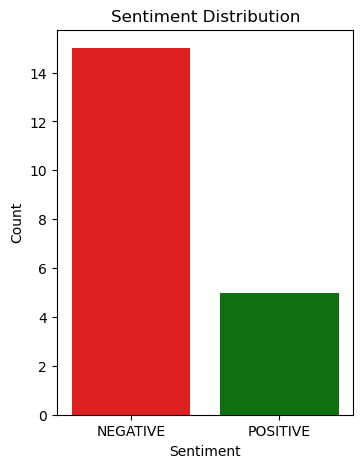

In [9]:
#Plot 1: Sentiment Distribution Bar Chart
plt.figure(figsize=(13, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='sentiment', data=df_t, palette={"POSITIVE": "green", "NEGATIVE": "red"})
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')   

Text(0, 0.5, 'Confidence')

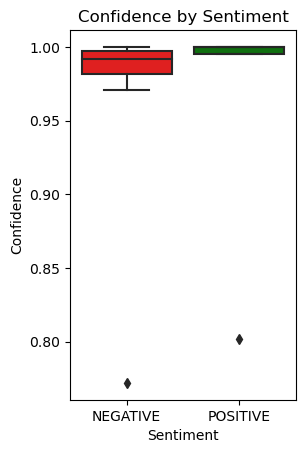

In [10]:
#Plot 2: Confidence Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='sentiment', y='confidence', data=df_t, palette={"POSITIVE": "green", "NEGATIVE": "red"})
plt.title('Confidence by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Confidence')

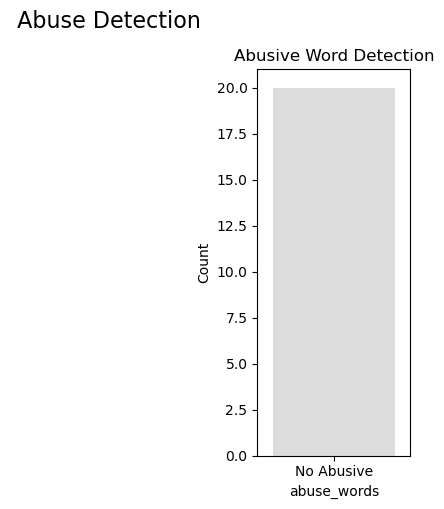

In [11]:
#plot 3: Abusive Words Presence
plt.subplot(1, 3, 3)
abusive_counts = df_t['abuse_words'].value_counts()
sns.barplot(x=abusive_counts.index.map({False: "No Abusive", True: "Abusive"}),
            y=abusive_counts.values, palette="coolwarm")
plt.title("Abusive Word Detection")
plt.ylabel("Count")

plt.tight_layout()
plt.suptitle(" Abuse Detection" , fontsize=16, y=1.05)
plt.show()